# Deskripsi Project

Pada Project ini akan dilakukan Analisis Data Eksploratif dengan dataset : 

pada dataset berikut (/datasets/project_sql_result_01.csv) - memuat data berikut ini:
1. company_name: nama perusahaan taksi
2. trips_amount: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.
________________
Dan dataset kedua (/datasets/project_sql_result_04.csv) - memuat data berikut ini:
1. dropoff_location_name: nama wilayah di Chicago tempat perjalanan berakhir
2. average_trips: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.
_________________
Pada dataset diatas saya melakukan Analisis Data Eskploratif yang meliputi : 
1. mengimpor kedua file
2. mempelajari isi data
3. memastikan tipe datanya sudah benar
4. mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran
5. membuat grafik: perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran
6. menarik kesimpulan berdasarkan grafik yang telah dibuat dan menjelaskan hasilnya
___________________
Lalu pada tahap Uji HIpotesis pada Dataset (/datasets/project_sql_result_07.csv) dimana File ini memuat data perjalanan dari Loop ke Bandara Internasional O'Hare. Ingat, berikut adalah nilai kolom-kolom yang ada di tabel ini:
1. start_ts — tanggal dan waktu penjemputan
2. weather_conditions — kondisi cuaca saat perjalanan dimulai
3. duration_seconds — durasi perjalanan dalam satuan detik

Dengan Hipotesis "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan."

## Memuat data dan mempelajari informasi keseluruhan pada data

### Memuat Libary yang dibutuhkan untuk pemrosesan data

In [1]:
# Memuat semua library

# import pandas and numpy untuk proses dan manipulasi data
import pandas as pd
import numpy as np 

# import math dan scipy untuk perhitungan statistika 
import math as mt
from math import factorial
from scipy import stats as st

# Import seaborn untuk statistika data visualisasi
import seaborn as sns

# import matplotlib untuk data visualisasi
import matplotlib.pyplot as plt 
from matplotlib import pyplot
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

# import date dan time untuk merubah tipe data
import time
import datetime
from datetime import datetime

# import warnings untuk menghapus peringatan saat dataset di manipulasi
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


### Memuat Data dari csv agar dapat dijalankan dengan pandas untuk menjadi DataFrame

In [3]:
# Memuat dataset 
query_result1 = pd.read_csv('/datasets/project_sql_result_01.csv')
query_result4 = pd.read_csv('/datasets/project_sql_result_04.csv') 

###  Memuat Informasi dari dataset dan mempelajari dataset

In [4]:
print('Informasi dari dataset query_result_1')
query_result1.sample(10)

Informasi dari dataset query_result_1


,company_name,trips_amount
57,Metro Group,11
33,Metro Jet Taxi A,146
25,Top Cab Affiliation,978
29,303 Taxi,250
13,Nova Taxi Affiliation Llc,3175
1,Taxi Affiliation Services,11422
55,6057 - 24657 Richard Addo,13
23,KOAM Taxi Association,1259
24,Chicago Taxicab,1014
50,2823 - 73307 Lee Express Inc,15


In [5]:
print('Informasi dari dataset query_result4')
query_result4.sample(10)

Informasi dari dataset query_result4


,dropoff_location_name,average_trips
63,Andersonville,16.866667
45,Boystown,53.966667
71,Edison Park,14.166667
1,River North,9523.666667
61,Grand Crossing,22.600000
48,Austin,44.433333
4,O'Hare,2546.900000
38,Armour Square,77.033333
27,Avondale,208.233333
41,North Park,67.833333


In [6]:
print('distribusi statisik pada dataset query_result1')
query_result1.describe()

distribusi statisik pada dataset query_result1


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
print('distribusi statisik pada dataset query_result4')
query_result4.describe()

distribusi statisik pada dataset query_result4


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [8]:
print('memeriksa nilai yang hilang / na pada dataset query_result1 :')
query_result1.isna().sum()

memeriksa nilai yang hilang / na pada dataset query_result1 :


company_name    0
trips_amount    0
dtype: int64

In [9]:
print('memeriksa nilai yang hilang / na pada dataset query_result4 :')
query_result4.isna().sum()

memeriksa nilai yang hilang / na pada dataset query_result4 :


dropoff_location_name    0
average_trips            0
dtype: int64

In [10]:
print('panjang baris dari dataset query_result1 :')
query_result1.shape

panjang baris dari dataset query_result1 :


(64, 2)

In [11]:
print('panjang baris dari dataset query_result4 :')
query_result4.shape

panjang baris dari dataset query_result4 :


(94, 2)

In [12]:
print('memeriksa duplikasi pada dataset query_result1 :')
print('nilai duplikat pada dataset :', query_result1.duplicated().sum())

memeriksa duplikasi pada dataset query_result1 :
nilai duplikat pada dataset : 0


In [13]:
print('memeriksa duplikasi pada dataset query_result4 :')
print('nilai duplikat pada dataset :', query_result4.duplicated().sum())

memeriksa duplikasi pada dataset query_result4 :
nilai duplikat pada dataset : 0


### Kesimpulan 

Setelah mempelajari kedua dataset dimana :
1. Tidak terdapat value yang hilang.
2. Tidak terdapat value yang terduplikasi. 

## Memastikan tipe datanya sudah benar

In [14]:
print('informasi tipe data & panjang baris , column dari dataset query_result1')
query_result1.info()

informasi tipe data & panjang baris , column dari dataset query_result1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [15]:
print('informasi tipe data & panjang baris , column dari dataset query_result1')
query_result4.info()

informasi tipe data & panjang baris , column dari dataset query_result1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### Kesimpulan:

Setelah melihat informasi tipe data pada kedua dataset dapat dipastikan tipe data sudah benar pada kedua dataset.

## Mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran

In [16]:
# Mengidentifikasi 10 wilayah teratas 
query_result4.nlargest(10, columns=["average_trips"])

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [17]:
# Memfilter 10 wilayah teratas
top_10_dropoff = query_result4.nlargest(10, columns=["average_trips"])

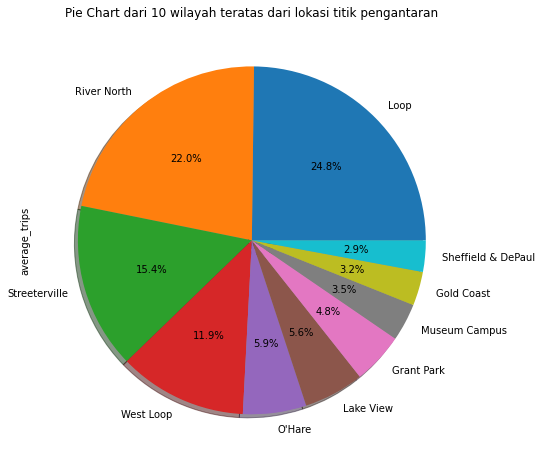

In [18]:
# Menampilkan Piechart dari 10 wilayah lokasi titik pengantaran
(top_10_dropoff.set_index("dropoff_location_name")
                .plot(y='average_trips', kind='pie',
                     title= 'Pie Chart dari 10 wilayah teratas dari lokasi titik pengantaran',
                     figsize=(10,8), autopct='%1.1f%%', legend = False, shadow=True));

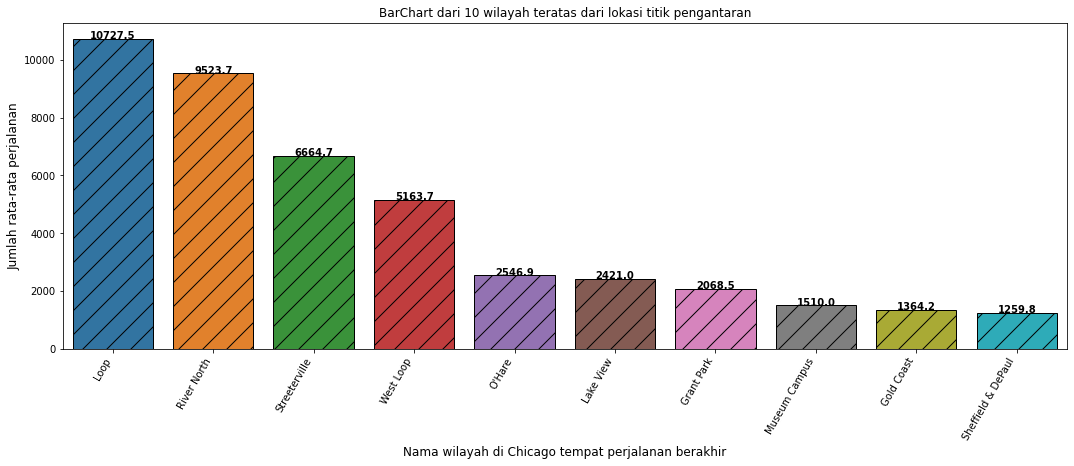

In [19]:
# Barplot dari 10 wilayah lokasi titik pengantaran
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.barplot(data= top_10_dropoff , x='dropoff_location_name', y='average_trips', edgecolor='black', hatch='/', errwidth=0)
ax.set_title('BarChart dari 10 wilayah teratas dari lokasi titik pengantaran', fontdict={'size':12})
ax.set_ylabel('Jumlah rata-rata perjalanan', fontdict={'size':12})
ax.set_xlabel('Nama wilayah di Chicago tempat perjalanan berakhir', fontdict={'size':12})
ax.set_xticklabels(top_10_dropoff['dropoff_location_name'], rotation=60, fontdict={'horizontalalignment':'right', 'size':10});

# Value Label 
for index, row in top_10_dropoff.iterrows():
    ax.text(row.name, row.average_trips, round(row.average_trips, 1), color='black', fontweight='bold' , ha="center")

### Kesimpulan 

Kesimpulan pada 10 Wilayah teratas yang dijadikan sebagai titik pengantaran :
1. Dapat kita lihat pada PieChart dimana persentase 10 wilayah titik pengantaran pada wilayah loop=24.8%,  River north=22%, streetville=15.4%, west_loop=11.9 dll. Serta dapat dilihat pada Barchart diatas menunjukkan bahwa jumlah rata-rata perjalanan di wilayah loop=10727.5, RiverNorth= 9523.7, streetville=6664.7, westloop=5163.7 dll. 
___________________
2. Dapat Ditarik Kesimpulan bahwa Wilayah dengan rata-rata perjalan yang banyak jatuh pada wilayah Loop, Rivernorth, Streetville, dan Westloop.

## Mengidentifikasi perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran pada tanggal 15-16 November 2017.

In [20]:
# Mengidentifikas Perusahaan taksi 10 teratas berdasarkan jumlah pengantaran
query_result1.nlargest(10, columns=["trips_amount"])

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [21]:
# Memfilter Perusahaan taksi 10 teratas berdasarkan jumlah pengantaran
top_10_compname = query_result1.nlargest(10, columns=["trips_amount"])

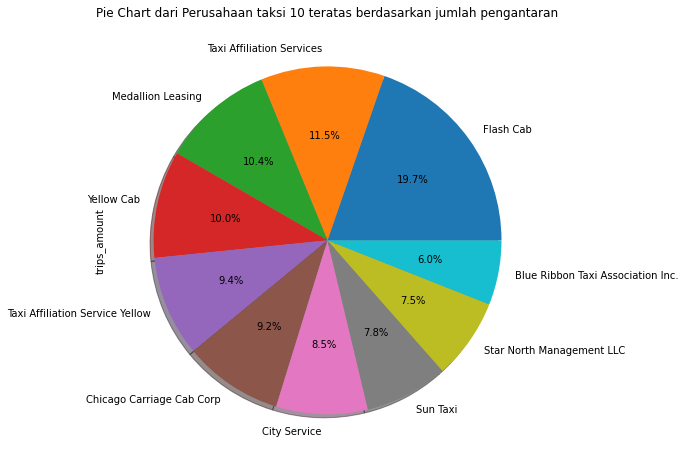

In [22]:
# Menampilkan PieChart Perusahaan taksi 10 teratas berdasarkan jumlah pengantaran
(top_10_compname.set_index("company_name")
                .plot(y='trips_amount', kind='pie',
                     title= 'Pie Chart dari Perusahaan taksi 10 teratas berdasarkan jumlah pengantaran',
                     figsize=(10,8), autopct='%1.1f%%', legend=False, shadow=True));

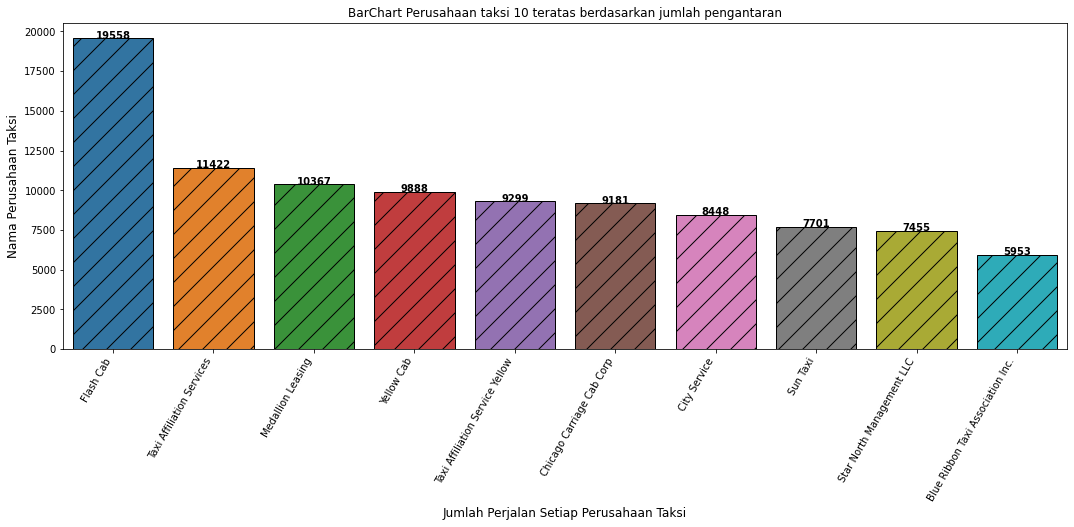

In [23]:
# Barplot dari Perusahaan taksi 10 teratas berdasarkan jumlah pengantaran
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.barplot(data= top_10_compname, x='company_name', y='trips_amount', edgecolor='black', hatch='/', errwidth=0)
ax.set_title('BarChart Perusahaan taksi 10 teratas berdasarkan jumlah pengantaran', fontdict={'size':12})
ax.set_ylabel('Nama Perusahaan Taksi', fontdict={'size':12})
ax.set_xlabel('Jumlah Perjalan Setiap Perusahaan Taksi', fontdict={'size':12})
ax.set_xticklabels(top_10_compname['company_name'], rotation=60, fontdict={'horizontalalignment':'right', 'size':10});

# Value Label 
for index, row in top_10_compname.iterrows():
    ax.text(row.name, row.trips_amount, round(row.trips_amount, 1), color='black', fontweight='bold' , ha="center")

### Kesimpulan 

Kesimpulan pada 10 Jumlah Perjalan Perusahaah Taksi pada tanggal 15-16 November 2017.
1. Dapat dilihat pada PieChart diatas bahwa 10 perusahaan taksi dengan persentasi jumlah perjalan terbanyak yakni flashcab=11.7%, TaxiAffiliationService=11.5%, Medalionleasing=10.4%, Yellowcab=10.0% etc. 
serta penjelasan dari BarChart diatas menunjukkan bahwa perusahaan taksi dengan jumlah perjalan terbanyak yaitu flashcab=19558, Taxiaffiliationservices=11422, medallionleasing=10367, yellowcab=9888 etc.
__________________________
2. Dapat ditarik kesimpulan bahwa perusaahaan yang memiliki jumlah perjalanan terbanyak adalah flashcab, taxiaffiliationservice, medalionleasing, yellowcab.

## Menguji Hipotesis 

/datasets/project_sql_result_07.csv — hasil dari kueri terakhir. File ini memuat data perjalanan dari Loop ke Bandara Internasional O'Hare. Ingat, berikut adalah nilai kolom-kolom yang ada di tabel ini:
_________________
start_ts — tanggal dan waktu penjemputan
weather_conditions — kondisi cuaca saat perjalanan dimulai
duration_seconds — durasi perjalanan dalam satuan detik
_________________
Uji hipotesis berikut:

"Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan."

Tentukan secara mandiri seberapa besar level signifikansinya (alpha).

Jelaskan:
Bagaimana Anda merumuskan hipotesis nol dan hipotesis alternatif
Kriteria apa yang Anda gunakan untuk menguji hipotesis dan alasan Anda menggunakannya

In [24]:
# Memuat Dataset 
query_result7 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [25]:
print('Informasi dari dataset query_result_7')
query_result7.sample(10)

Informasi dari dataset query_result_7


,start_ts,weather_conditions,duration_seconds
418,2017-11-04 07:00:00,Good,1563.0
419,2017-11-25 11:00:00,Good,1541.0
120,2017-11-04 14:00:00,Good,3240.0
840,2017-11-11 11:00:00,Good,1740.0
773,2017-11-11 11:00:00,Good,2032.0
1015,2017-11-11 13:00:00,Good,2449.0
958,2017-11-11 21:00:00,Good,1363.0
782,2017-11-11 16:00:00,Good,2400.0
186,2017-11-25 09:00:00,Good,1473.0
841,2017-11-04 12:00:00,Good,2520.0


In [26]:
print('informasi tipe data & panjang baris , column dari dataset query_result7')
query_result7.info()

informasi tipe data & panjang baris , column dari dataset query_result7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [27]:
print('memeriksa nilai yang hilang / na pada dataset query_result7 :')
query_result7.isna().sum()

memeriksa nilai yang hilang / na pada dataset query_result7 :


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Kesimpulan : 

Setelah melihat informasi umum dari dataset didapati bahwa pada table start_ts memiliki tipe data yang salah yang seharusnya datetime. mari kita ubah pada langkah selanjutnya.

### Mengubah tipe data 

In [28]:
# Mengubah Tipe data variable start_ts dari obj menjadi date time

query_result7['start_ts'] = pd.to_datetime(query_result7['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='raise')
print(query_result7['start_ts'])

0      2017-11-25 16:00:00
1      2017-11-25 14:00:00
2      2017-11-25 12:00:00
3      2017-11-04 10:00:00
4      2017-11-11 07:00:00
               ...        
1063   2017-11-25 11:00:00
1064   2017-11-11 10:00:00
1065   2017-11-11 13:00:00
1066   2017-11-11 08:00:00
1067   2017-11-04 16:00:00
Name: start_ts, Length: 1068, dtype: datetime64[ns]


Kesimpulan :

table start_ts sudah berhasil di konversi ke tipedata yang sesuai. langkah selanjutanya mari kita cek distribusi datanya.


### Melihat distribusi data

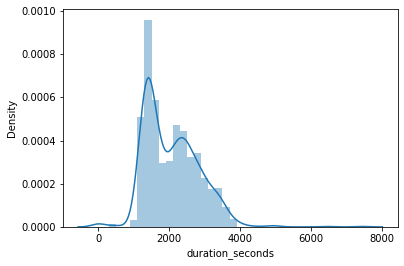

In [29]:
# Histogram dari distribusi data variabel duration_second
sns.distplot(query_result7["duration_seconds"], bins=list(range(100, 4000, 200)));

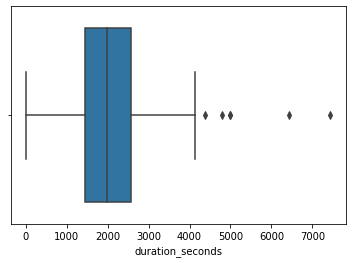

In [30]:
# Boxplot dari distribusi data variabel duration_second
sns.boxplot(query_result7["duration_seconds"]);


In [31]:
# Disribusi Data statistik dari distribusi data variabel duration_second
query_result7["duration_seconds"].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Kesimpulan :

1. Dapat dilihat pada hasil distribusi data statistik pada variabel duration_second memiliki distribusi dengan kemiringan positif yang dapat dilihat bahwa mean/rata-rata = 2071 dari variable duration_seconds lebih besar dari pada mediannya = 1438.

### Memfilter data untuk menguji hipotesis "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan."

In [32]:
query_result7

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [33]:
# Memfilter kondisi cuaca buruk pada dataset
saturday_bad_con = query_result7[(query_result7.weather_conditions!='Good') & (query_result7.start_ts.dt.weekday==5)]["duration_seconds"]
print(saturday_bad_con)


6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64


In [34]:
# Memfilter kondisi cuaca bagus pada dataset
saturday_good_con = query_result7[(query_result7.weather_conditions=='Good') & (query_result7.start_ts.dt.weekday==5)]["duration_seconds"]
saturday_good_con

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [35]:
# Menghitung rata-rata dari cuaca buruk dan bagus 

avg_saturday_bad_con = query_result7[(query_result7.weather_conditions!='Good') & (query_result7.start_ts.dt.weekday==5)]["duration_seconds"].mean()
avg_saturday_good_con = query_result7[(query_result7.weather_conditions=='Good') & (query_result7.start_ts.dt.weekday==5)]["duration_seconds"].mean()

print('Rata-rata dari cuaca buruk adalah {:.2f}'.format(avg_saturday_bad_con) + ' and ' + \
      'rata-rata dari rating pengguna untuk platform PC adalah {:.2f}'.format(avg_saturday_good_con))
diff = (avg_saturday_bad_con - avg_saturday_good_con) / avg_saturday_bad_con * 100
print('Persentasi Selisih Rata-rata dari cuaca buruk dan cuaca bagis adalah {:.2f}%'.format(diff))

Rata-rata dari cuaca buruk adalah 2427.21 and rata-rata dari rating pengguna untuk platform PC adalah 1999.68
Persentasi Selisih Rata-rata dari cuaca buruk dan cuaca bagis adalah 17.61%


Kesimpulan :

a. Setelah menghitung rata-rata dari cuaca buruk dan bagus didapati durasi perjalanan dari wilayah Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan dimana kita membandingkan rata-rata dari durasi perjalan dengan cuaca yang buruk = 2427.21 dana durasi perjalan dengan cuaca yang bagus = 1999.68.
__________
b. alih-alih hanya berasumsi berdasarkan nilai rata-rata dari cuaca buruk dan bagus pada tahap selanjutnya kita akan melakukan uji statistik dengan merumuskan hipotesis null : "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak berubah pada hari-hari Sabtu yang hujan" dan hipotesis alternatifnya "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan". 
___________
c. Untuk melakukan pengujian hipotesis diatas kita menggunakan nilai signifikansi atau alpha 0.05 yang berarti dalam 5% tingkat signifikansi kesalahannya. Dimana kita akan menolak hipotesis nol ketika hipotesis alternatif nya benar lalu menggunakan uji-t untuk menguji hipotesis karena membandingkan rata-rata dua kelompok untuk menentukan apakah kedua kelompok ini berbeda satu sama lain.

Perumusan Hipotesis:

1. Ho (Hipotesis nol)   = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak berubah pada hari-hari Sabtu yang hujan"
_______________________________
2. H1 (Hipotesis alternatif) =  "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan"
_________________________________
3. α (alpha) tingkat signifikansi  = 0.05 
_________________________________
4. Jika p-value < (lebih kecil), maka hipotesis nol ditolak. jika p-value > (lebih besar) , maka hipotesis nol diterima.

In [36]:
#  Fungsi untuk menentukan hasil hipotesis

def hipotesis_test(variable1, variable2, alpha):
    
    # Menentukan nilai signifikasi alpha 
    alpha = alpha
    
    # Menguji hipotesis dengan rata-rata dari dua populasi
    results = st.ttest_ind(variable1, variable2, equal_var = False)
    print('Nilai p-value adalah : {}'.format(results.pvalue))
    
    # Hasil dari p-value
    if (results.pvalue < alpha ):
         print('Kita dapat menolak Ho')
    else :
        print('Kita tidak dapat menolak Ho')

In [37]:
# Menguji hipotesis 

hipotesis_test(saturday_bad_con, saturday_good_con, 0.05)

Nilai p-value adalah : 6.738994326108734e-12
Kita dapat menolak Ho


## Kesimpulan akhir: 

Setelah menguji hipotesis null dengan menyatakan bahwa tidak "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak berubah pada hari-hari Sabtu yang hujan"  dengan menggunakan nilai signifikansi 0.05 dan didapati hasil uji hipotesis bahwa p-valuenya lebih kecil dari 0.05 maka kita dapat menolak Hipotesis null dan Menerima hipotesis alternatif dimana "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan".